In [9]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential,load_model
from tensorflow.keras.utils import to_categorical

np.random.seed(10)

(X_train,Y_train),(X_test,Y_test)=mnist.load_data() #接訓練資料
#正規化,reshape
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test= X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255
#轉onehotcode
Y_train=to_categorical(Y_train)
Y_test_bk=Y_test.copy()
Y_test=to_categorical(Y_test)

#建立並載入模型訓練結果
model=Sequential()
model=load_model('mnist.h5')

In [10]:
#混淆矩陣
import pandas as pd
Y_probability=model.predict(X_test,batch_size=1)
Y_predict=np.argmax(Y_probability,axis=1)
loss,accuracy=model.evaluate(X_test,Y_test)
print('準確度為：',accuracy)
tb=pd.crosstab(Y_test_bk.astype(int),Y_predict.astype(int),rownames=['label'],colnames=['predict'])
print(tb)

313/313 [==============================] - 2s 6ms/step - loss: 0.0237 - accuracy: 0.9917
準確度為： 0.9916999936103821
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        976     1     0     0    0    0    1     1    1    0
1          0  1129     1     1    0    1    0     2    1    0
2          1     0  1026     0    0    0    0     5    0    0
3          0     0     1  1005    0    1    0     2    1    0
4          0     1     0     0  976    0    0     0    0    5
5          0     0     0     6    0  882    1     1    0    2
6          6     2     0     0    1    0  948     0    1    0
7          0     1     5     1    0    0    0  1020    1    0
8          1     1     1     4    1    1    0     2  960    3
9          0     2     0     0    6    2    0     4    0  995


83


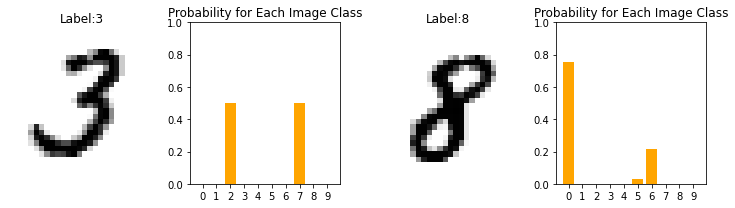

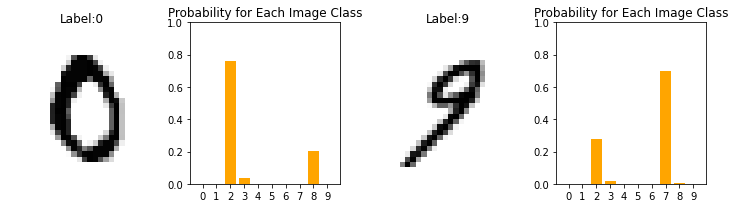

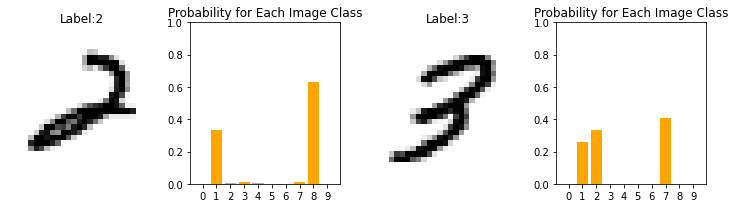

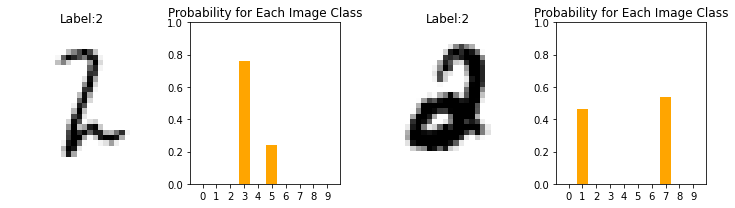

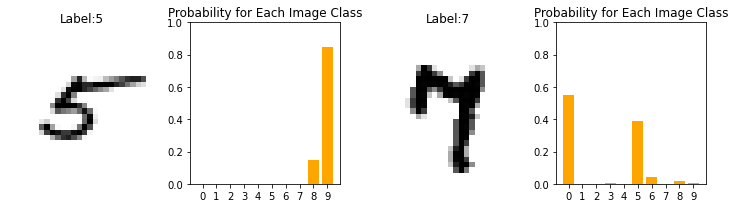

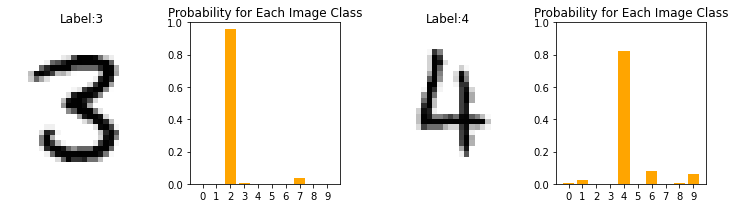

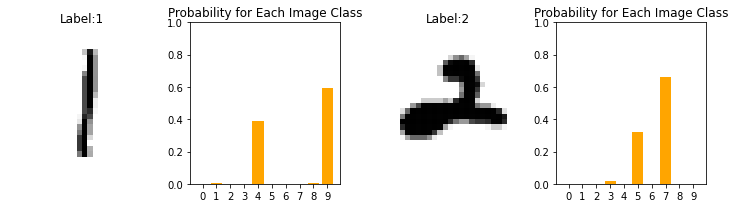

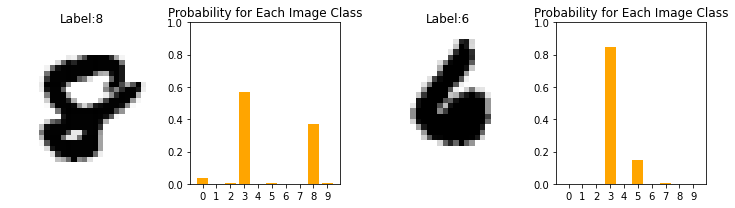

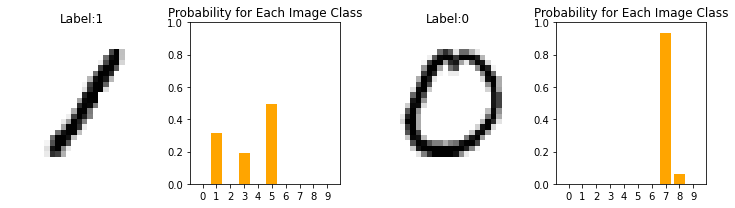

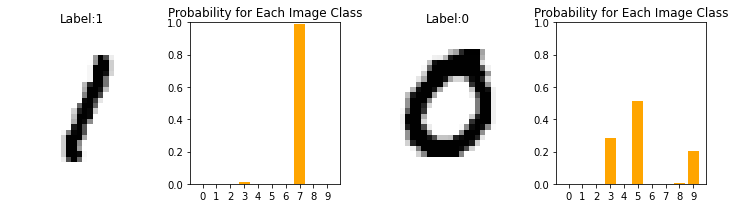

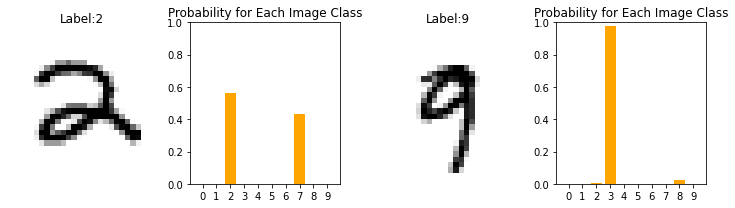

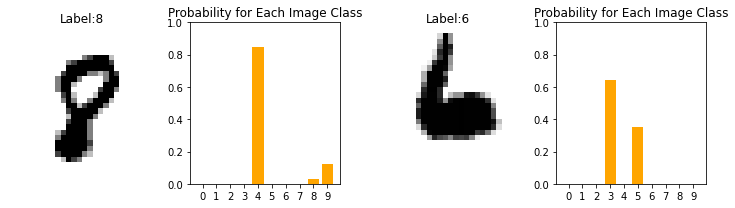

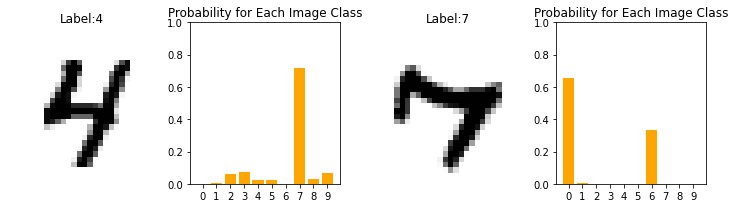

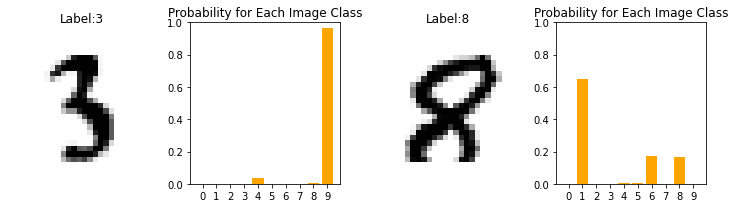

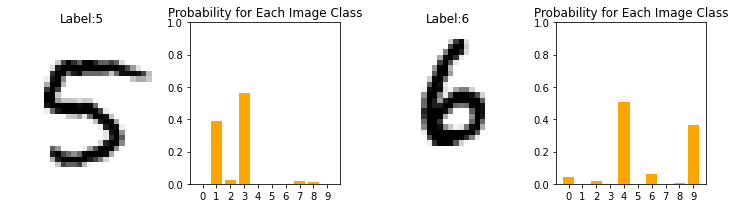

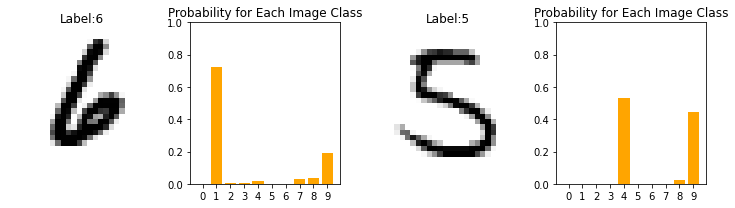

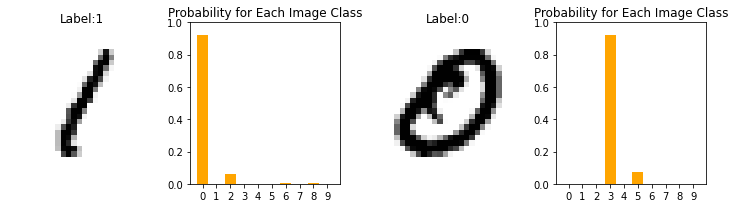

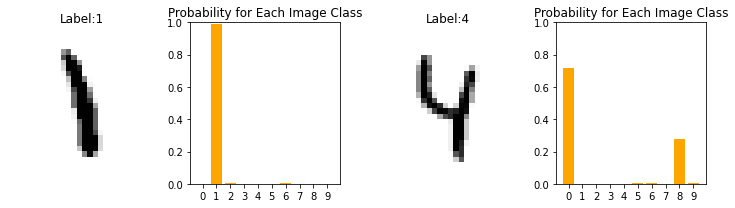

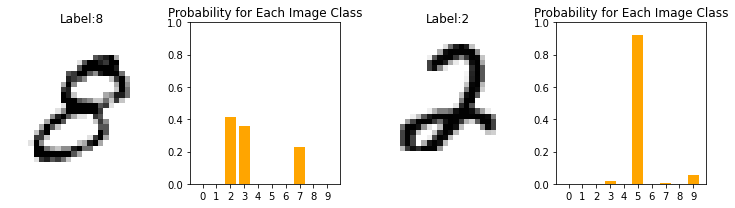

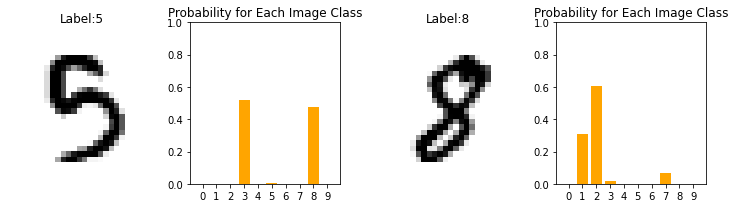

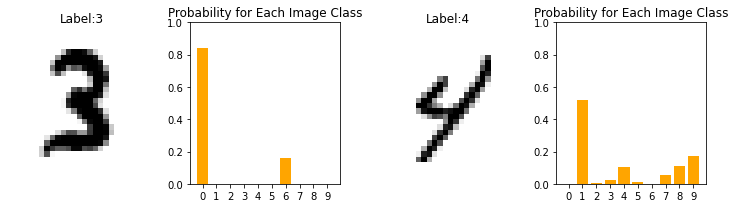

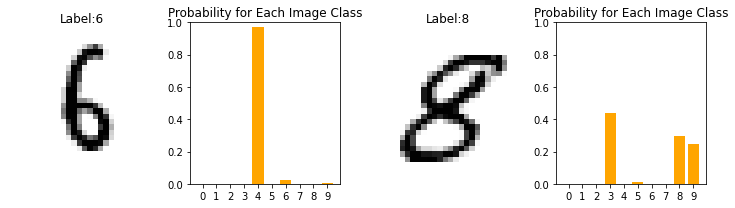

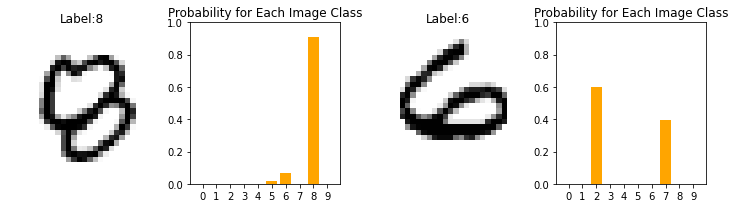

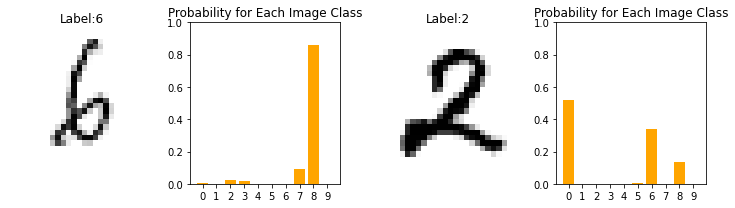

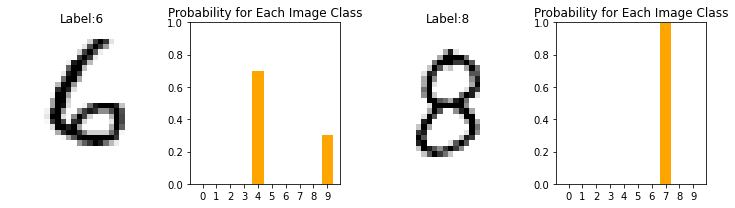

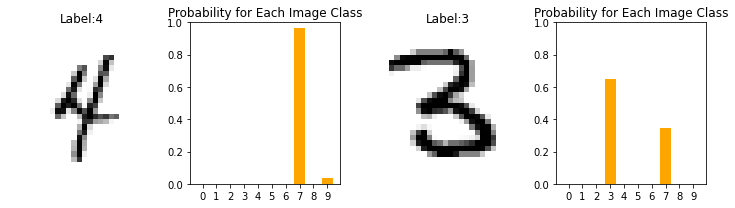

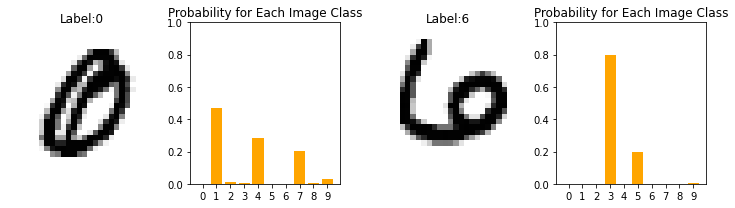

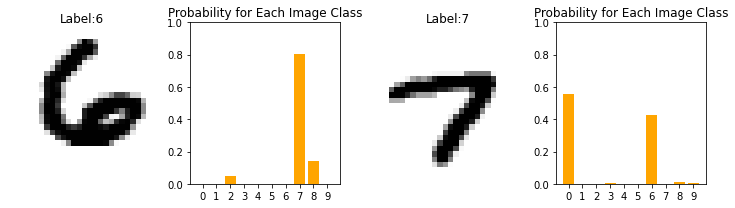

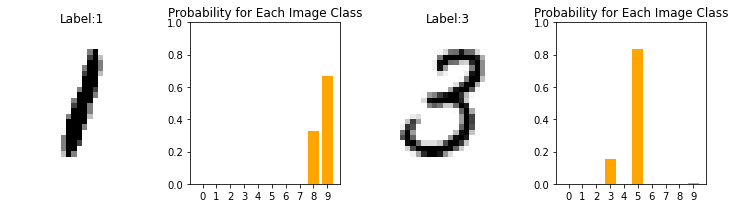

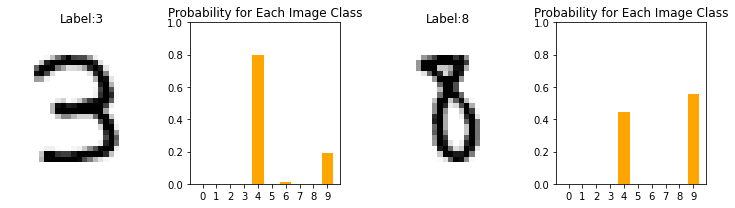

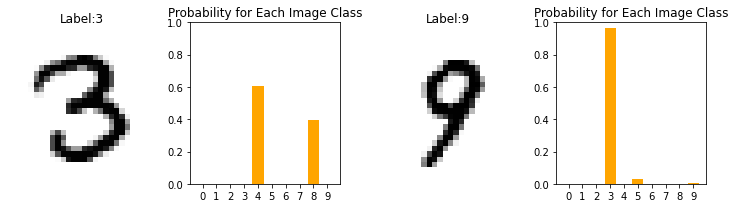

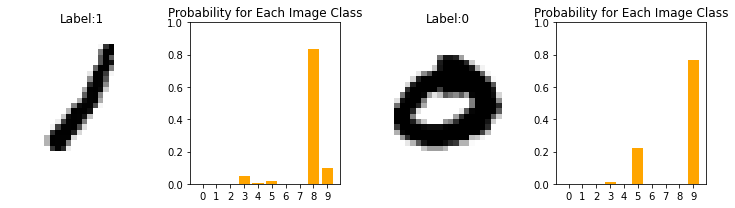

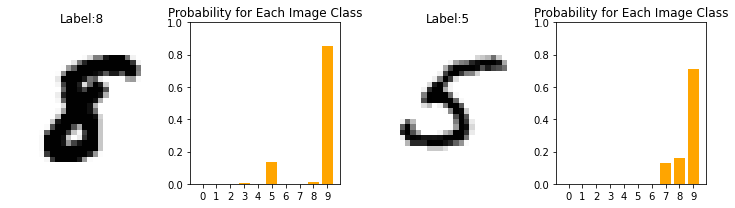

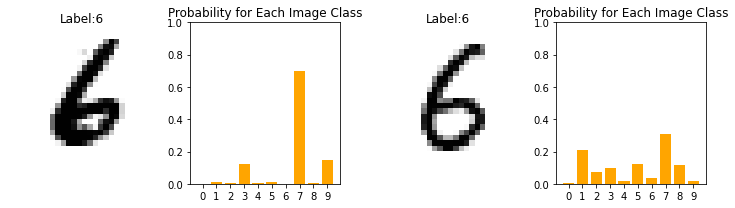

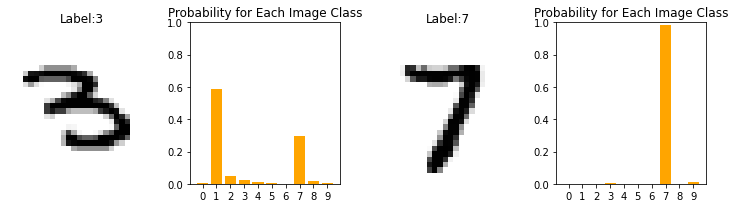

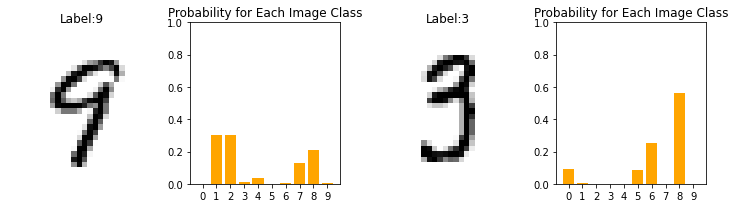

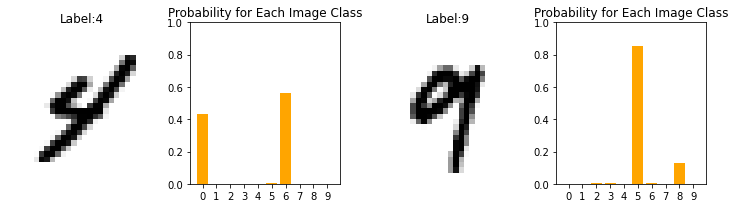

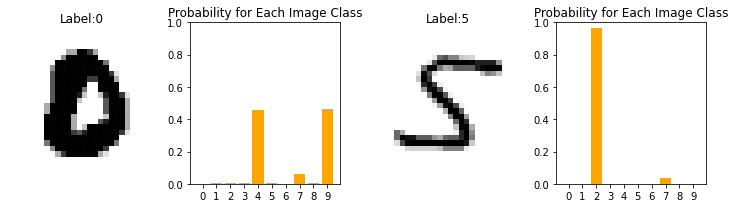

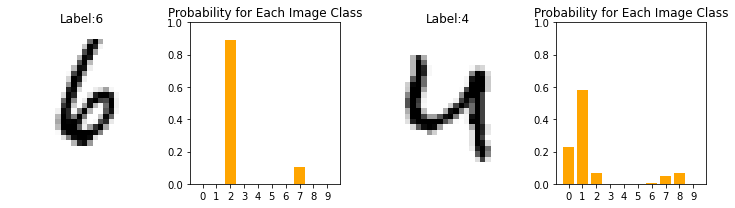

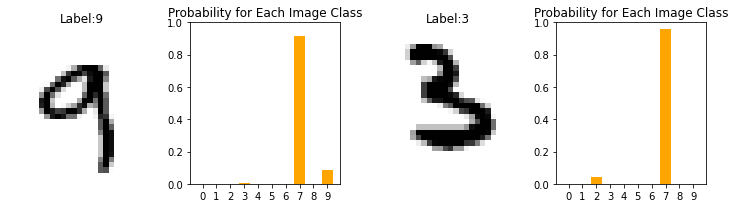

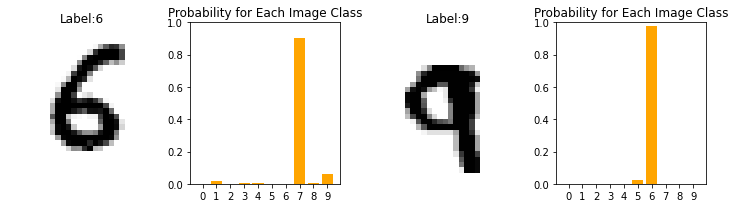

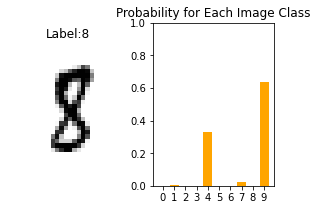

In [12]:
#畫圖
import matplotlib.pyplot as plt
%matplotlib inline
location=[]
for i,label in enumerate(Y_test_bk):
    if label != Y_predict[i]:
        location.append(i)
print(len(location)) #看看有多少個

#test=[2,4,5,6,7,8] #先試看看
for number,index in enumerate(location):
    if number%2==0: #若是第0,2,4...個數字要畫在前兩個
        plt.figure(figsize=[10,3])
        img=plt.subplot(1,4,1)
        img.imshow(X_train[index],cmap='binary')
        img.set_title('Label:'+str(Y_train_bk[index]))
        img.axis('off')
        bar=plt.subplot(1,4,2)
        bar.bar(range(0,10),Y_probability[index],color='orange')
        bar.set_title('Probability for Each Image Class')
        bar.set_xticks(range(0,10))
        bar.set_ylim(0,1)
    else:           #若是第1,3,5...個數字要畫在後兩個
        img=plt.subplot(1,4,3)
        img.imshow(X_train[index],cmap='binary')
        img.set_title('Label:'+str(Y_train_bk[index]))
        img.axis('off')
        bar=plt.subplot(1,4,4)
        bar.bar(range(0,10),Y_probability[index],color='orange')
        bar.set_title('Probability for Each Image Class')
        bar.set_xticks(range(0,10))
        bar.set_ylim(0,1)
    if number>0 and number%2!=0: #每兩個數字印出一次
        plt.tight_layout()
        plt.show()